In [36]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
# Define the tickers and date range
tickers = ["QQQ", "SQQQ"]
start_date = "2020-03-01"
end_date = "2020-03-30"

# Download data for both tickers
data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker", progress=False)

# Extract "Close" prices
qqq_data = data.loc[:, ('QQQ', 'Close')]
sqqq_data = data.loc[:, ('SQQQ', 'Close')]

# Debugging: Print first few rows
print(qqq_data.head())
print(sqqq_data.head())


Date
2020-03-02    209.890167
2020-03-03    203.159622
2020-03-04    211.635910
2020-03-05    205.205948
2020-03-06    201.743652
Name: (QQQ, Close), dtype: float64
Date
2020-03-02    2244.864502
2020-03-03    2469.686523
2020-03-04    2162.094482
2020-03-05    2353.360596
2020-03-06    2470.805176
Name: (SQQQ, Close), dtype: float64


In [38]:
# Check if data is not empty
if not qqq_data.empty and not sqqq_data.empty:
    # Calculate daily returns
    qqq_returns = qqq_data.pct_change()
    sqqq_returns = sqqq_data.pct_change()

    # Simulate maximum efficiency portfolio
    optimal_portfolio = [1.0]  # Start with $1

    for i in range(1, len(qqq_returns)):
        if qqq_returns[i] > sqqq_returns[i]:
            optimal_portfolio.append(optimal_portfolio[-1] * (1 + qqq_returns[i]))
        else:
            optimal_portfolio.append(optimal_portfolio[-1] * (1 + sqqq_returns[i]))

    # Create a DataFrame for plotting
    optimal_portfolio = pd.Series(optimal_portfolio, index=qqq_returns.index)
    comparison_df = pd.DataFrame({
        "QQQ": (qqq_data / qqq_data.iloc[0]) * 100,
        "SQQQ": (sqqq_data / sqqq_data.iloc[0]) * 100,
        "Optimal Portfolio": (optimal_portfolio / optimal_portfolio.iloc[0]) * 100
    })
else:
    print("Data is empty. Please check the data source and try again.")


C:\Users\sirja\AppData\Local\Temp\ipykernel_11408\3027315610.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if qqq_returns[i] > sqqq_returns[i]:
C:\Users\sirja\AppData\Local\Temp\ipykernel_11408\3027315610.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  optimal_portfolio.append(optimal_portfolio[-1] * (1 + sqqq_returns[i]))
C:\Users\sirja\AppData\Local\Temp\ipykernel_11408\3027315610.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `se

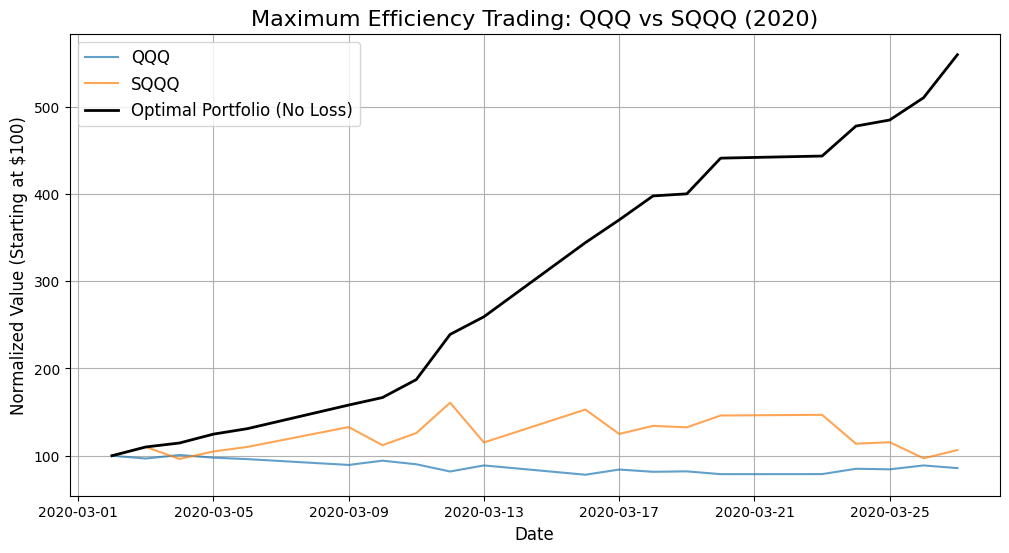

In [39]:
# Ensure comparison_df is defined
if 'comparison_df' in globals():
	# Plot the performance
	plt.figure(figsize=(12, 6))
	plt.plot(comparison_df["QQQ"], label="QQQ", alpha=0.7)
	plt.plot(comparison_df["SQQQ"], label="SQQQ", alpha=0.7)
	plt.plot(comparison_df["Optimal Portfolio"], label="Optimal Portfolio (No Loss)", linewidth=2, color="black")

	plt.title("Maximum Efficiency Trading: QQQ vs SQQQ (2020)", fontsize=16)
	plt.xlabel("Date", fontsize=12)
	plt.ylabel("Normalized Value (Starting at $100)", fontsize=12)
	plt.legend(fontsize=12)
	plt.grid(True)
	plt.show()
else:
	print("comparison_df is not defined. Please ensure the previous cells are executed.")


In [40]:
# Combine the gains from QQQ and SQQQ
combined_gains = pd.DataFrame({
	"QQQ Returns": qqq_returns,
	"SQQQ Returns": sqqq_returns
})

# Print the first few rows of combined_gains
print(combined_gains.head())


            QQQ Returns  SQQQ Returns
Date                                 
2020-03-02          NaN           NaN
2020-03-03    -0.032067      0.100149
2020-03-04     0.041722     -0.124547
2020-03-05    -0.030382      0.088463
2020-03-06    -0.016872      0.049905
